# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [14]:
import pandas as pd
import numpy as np
env=pd.read_csv("/Users/tao/assignment-4/data/Arrigetch_Peaks_Environmental_Data.csv")
species=pd.read_csv("/Users/tao/assignment-4/data/Arrigetch_Peaks_Species_Data.csv")
print(env.head())
print(species.head())
print('dimensions of env is',env.shape)
print('dimensions of species is',species.shape)

   TURBOVEG_PLOT_NUMBER                            PLANT_COMMUNITY_NAME  \
0                 10925  Ass. Umbilicarietum pensylvanicae-carolinianae   
1                 10926  Ass. Umbilicarietum pensylvanicae-carolinianae   
2                 10927  Ass. Umbilicarietum pensylvanicae-carolinianae   
3                 10928  Ass. Umbilicarietum pensylvanicae-carolinianae   
4                 10929  Ass. Umbilicarietum pensylvanicae-carolinianae   

   ELEVATION  ASPECT  SLOPE  COVER_LITTER_LAYER  COVER_OPEN_WATER  COVER_ROCK  \
0       1090      45  -9999                   0                 0           0   
1        920     315  -9999                   0                 0           0   
2        940     270  -9999                   0                 0           0   
3        950     225  -9999                   0                 0           0   
4        935     270  -9999                   0                 0           0   

   COVER_CRUST  COVER_BARE_SOIL  \
0            0             

In [15]:
env=env.replace(-9999, np.NaN)
species=species.replace(-9999, np.NaN)
print(env.head())

   TURBOVEG_PLOT_NUMBER                            PLANT_COMMUNITY_NAME  \
0                 10925  Ass. Umbilicarietum pensylvanicae-carolinianae   
1                 10926  Ass. Umbilicarietum pensylvanicae-carolinianae   
2                 10927  Ass. Umbilicarietum pensylvanicae-carolinianae   
3                 10928  Ass. Umbilicarietum pensylvanicae-carolinianae   
4                 10929  Ass. Umbilicarietum pensylvanicae-carolinianae   

   ELEVATION  ASPECT  SLOPE  COVER_LITTER_LAYER  COVER_OPEN_WATER  COVER_ROCK  \
0     1090.0    45.0    NaN                   0                 0           0   
1      920.0   315.0    NaN                   0                 0           0   
2      940.0   270.0    NaN                   0                 0           0   
3      950.0   225.0    NaN                   0                 0           0   
4      935.0   270.0    NaN                   0                 0           0   

   COVER_CRUST  COVER_BARE_SOIL  \
0            0             

In [16]:
unique_name=[]
for index,row in env.iterrows():
    plant_community=row['PLANT_COMMUNITY_NAME']
    if plant_community not in unique_name:
        unique_name.append(plant_community)
print('there are',len(unique_name),'unique species')

there are 51 unique species


In [17]:
envs=env.drop('TURBOVEG_PLOT_NUMBER',axis=1)
summary=envs.describe()
print(summary)

         ELEVATION      ASPECT  SLOPE  COVER_LITTER_LAYER  COVER_OPEN_WATER  \
count   374.000000  244.000000  147.0          439.000000             439.0   
mean   1111.802139  184.241803    0.0           36.913440               0.0   
std     227.223605  103.151667    0.0           30.059329               0.0   
min     730.000000    0.000000    0.0            0.000000               0.0   
25%     940.000000  135.000000    0.0            8.000000               0.0   
50%    1050.000000  180.000000    0.0           30.000000               0.0   
75%    1270.000000  270.000000    0.0           65.000000               0.0   
max    1920.000000  360.000000    0.0          100.000000               0.0   

       COVER_ROCK  COVER_CRUST  COVER_BARE_SOIL  
count  439.000000   439.000000       439.000000  
mean    13.936219     4.341686        14.321185  
std     18.166670    12.113122        17.990339  
min      0.000000     0.000000         0.000000  
25%      1.000000     0.000000        

In [18]:
merged_data = pd.merge(env, species, on='TURBOVEG_PLOT_NUMBER')
print(merged_data)

     TURBOVEG_PLOT_NUMBER                            PLANT_COMMUNITY_NAME  \
0                   10925  Ass. Umbilicarietum pensylvanicae-carolinianae   
1                   10926  Ass. Umbilicarietum pensylvanicae-carolinianae   
2                   10927  Ass. Umbilicarietum pensylvanicae-carolinianae   
3                   10928  Ass. Umbilicarietum pensylvanicae-carolinianae   
4                   10929  Ass. Umbilicarietum pensylvanicae-carolinianae   
..                    ...                                             ...   
434                 11359        Carex podocarpa-Salix rotundifolia comm.   
435                 11360     Senecio tomentosus-Salix rotundifolia comm.   
436                 11361     Senecio tomentosus-Salix rotundifolia comm.   
437                 11362     Senecio tomentosus-Salix rotundifolia comm.   
438                 11363                Ass. Andreaetum blytti-rupestris   

     ELEVATION  ASPECT  SLOPE  COVER_LITTER_LAYER  COVER_OPEN_WATER  \
0   

In [19]:
num_missing_rows = merged_data.isna().any(axis=1).sum()
print(num_missing_rows,'rows have missing data')

422 rows have missing data


In [20]:
species_counts = merged_data.groupby('PLANT_COMMUNITY_NAME').TURBOVEG_PLOT_NUMBER.nunique()
most_common_species = species_counts.sort_values(ascending=False).index[0]
print(f'The species that was present in the most plots is {most_common_species}')

The species that was present in the most plots is Caricetum scirpoideae-rupestris


In [21]:
totals = species.drop('TURBOVEG_PLOT_NUMBER', axis=1).sum(axis=1)
species['totals'] = totals
print(species.head())

   TURBOVEG_PLOT_NUMBER  Abietinella abietina  Acarospora schleicheri  \
0                 10925                   0.0                     0.0   
1                 10926                   0.0                     0.0   
2                 10927                   0.0                     0.0   
3                 10928                   0.0                     0.0   
4                 10929                   0.0                     0.0   

   Aconitum delphinifolium delphinifolium  Alectoria ochroleuca  \
0                                     0.0                   0.0   
1                                     0.0                   6.0   
2                                     0.0                   0.0   
3                                     0.0                   0.0   
4                                     0.0                   2.0   

   Parmelia almquistii  Dactylina madreporiformis  Alnus crispa crispa  \
0                  1.0                        0.0                    0   
1         

The description is inconsistent with the data set, there are floats and numbers over 5 in the data set, so the numbers most likely represented number of individuals per species, so the easier way of making them consistent is to change the unit in description to # of individuals, and the explanation itself to species individual numbers. 

## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




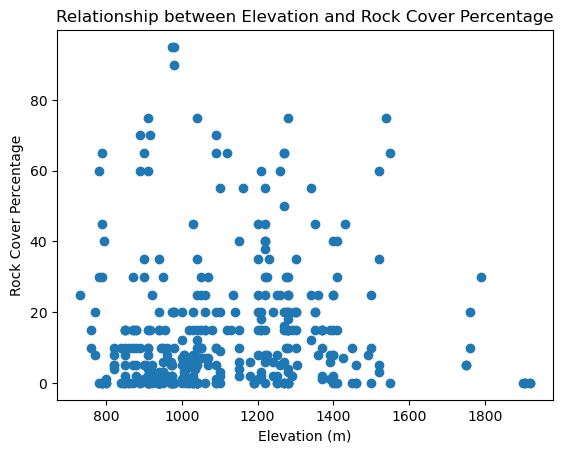

In [22]:
import matplotlib.pyplot as plt
plt.scatter(env['ELEVATION'], env['COVER_ROCK'])
plt.xlabel('Elevation (m)')
plt.ylabel('Rock Cover Percentage')
plt.title('Relationship between Elevation and Rock Cover Percentage')
plt.show()

Based on the graph above, there is no relationship between elevation and rock cover percantage. 

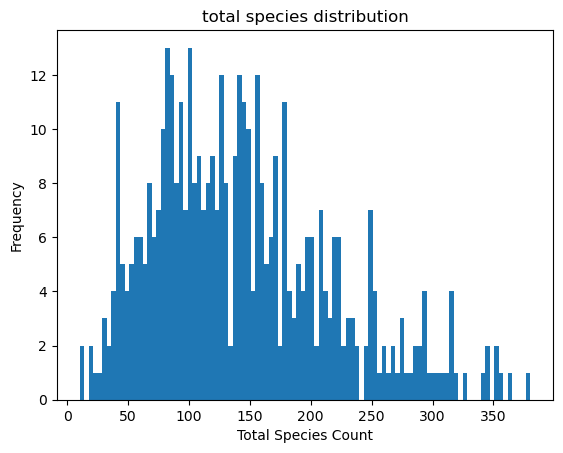

count    439.000000
mean     144.146469
std       74.729961
min       10.000000
25%       87.000000
50%      132.000000
75%      188.250000
max      380.500000
Name: totals, dtype: float64


In [23]:
plt.hist(species['totals'],bins=100)
plt.xlabel('Total Species Count')
plt.ylabel('Frequency')
plt.title('total species distribution')
plt.show()

print(species['totals'].describe())


In [24]:
communities = ["Caricetum scirpoideae-rupestris", "Pedicularo kanei-Caricetum glacialis", "Saxifrago tricuspidatae-Artemisietum alaskanae"]
env_subset = env[env["PLANT_COMMUNITY_NAME"].isin(communities)]
print(env_subset)

     TURBOVEG_PLOT_NUMBER                            PLANT_COMMUNITY_NAME  \
253                 11178                 Caricetum scirpoideae-rupestris   
254                 11179                 Caricetum scirpoideae-rupestris   
255                 11180                 Caricetum scirpoideae-rupestris   
256                 11181                 Caricetum scirpoideae-rupestris   
257                 11182                 Caricetum scirpoideae-rupestris   
258                 11183                 Caricetum scirpoideae-rupestris   
259                 11184                 Caricetum scirpoideae-rupestris   
260                 11185                 Caricetum scirpoideae-rupestris   
261                 11186                 Caricetum scirpoideae-rupestris   
262                 11187                 Caricetum scirpoideae-rupestris   
263                 11188                 Caricetum scirpoideae-rupestris   
264                 11189                 Caricetum scirpoideae-rupestris   

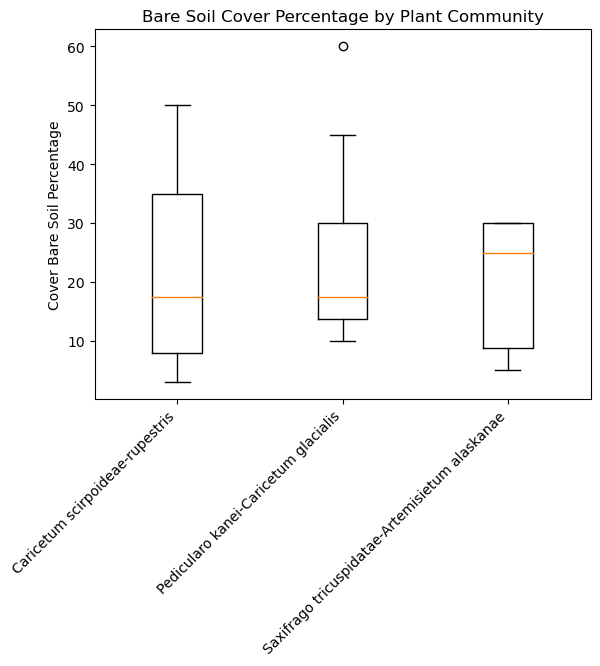

In [25]:
plt.boxplot([env_subset[env_subset["PLANT_COMMUNITY_NAME"] == c]["COVER_BARE_SOIL"] for c in communities], labels=communities)
plt.title("Bare Soil Cover Percentage by Plant Community")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Cover Bare Soil Percentage")
plt.show()

There is different in mean cover bare soil percentage among plant communityes. Sacifrago tricuspidatae-Artemisietum aleskanae has the highest median, 
Pedicularo kanei-Caricetum glacialis has the lowerst median. Caricetum scirpoideae-rupestris has the widest spread, saxifrago tricuspidatae-Artemisietum alaskanae has the narrowest spread. 